___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
#!python --version

Python 3.8.5


In [3]:
%pip install tensorflow

  Using cached tensorflow-2.10.0-cp38-cp38-win_amd64.whl (455.9 MB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached grpcio-1.49.1-cp38-cp38-win_amd64.whl (3.6 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     -------------------------------------- 896.1/896.1 kB 2.8 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
     ---------------------------------------- 2.6/2.6 MB 4.0 MB/s eta 0:00:00
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached termcolor-2.0.1-py3-none-any.whl (5.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_io_gcs_filesystem-0.27.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached t

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import tensorflow as tf
tf.__version__

'2.10.0'

# Keras Syntax Basics

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [6]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [7]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [9]:
df.shape

(1000, 3)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


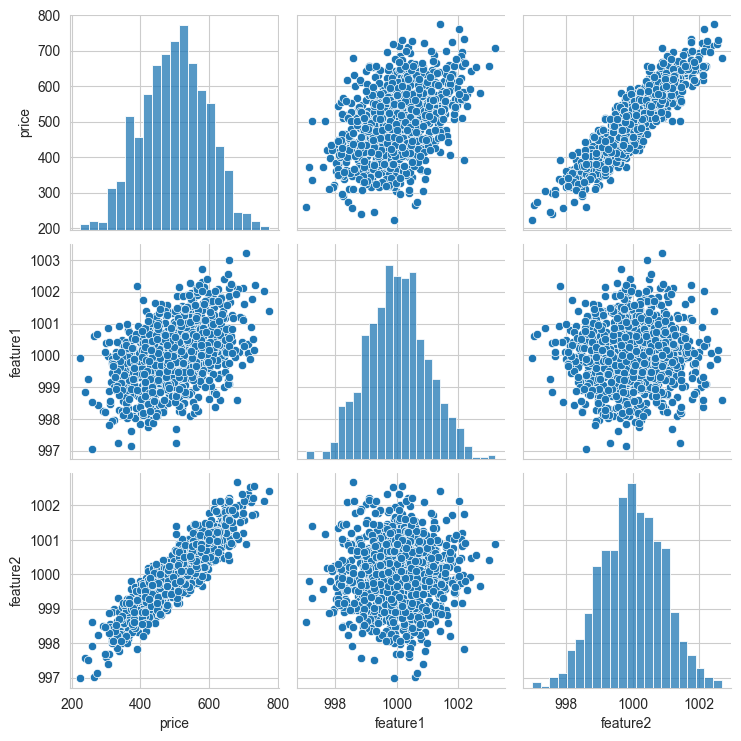

In [8]:
sns.pairplot(df);

In [9]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [10]:
from sklearn.model_selection import train_test_split

In [82]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values                   # neuron network'te dataframe formatında değil array formatında istiyor.

In [11]:
X = df[['feature1', 'feature2']]      # Aşağıda Scaling yapacağımız ve scalingte array formatına getireceği için alabildik.
y = df['price']

In [12]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [13]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
X_train.shape

(700, 2)

In [16]:
X_test.shape

(300, 2)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [21]:
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [23]:
# help(Sequential)

In [24]:
# help(Dense)

In [25]:
X_train.shape

(700, 2)

In [93]:
# First way to create model

#model = Sequential([Input(shape = X_train.shape[1]),
#                   Dense(units = 4, activation = "relu"),
#                    Dense(units = 4, activation = "relu"),
#                    Dense(units = 4, activation = "relu"),
#                    Dense(units = 1)])

In [26]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1])) #units=neuron 
model.add(Dense(units = 4, activation = "relu"))                           #input_dim = X_train.shape[1] 1.katmanın boyutu
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.3218565 , -0.6748619 , -0.61721396, -0.18565321],
        [-0.0639956 ,  0.82312894, -0.8933108 , -0.00479221]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.56871074, -0.00300318,  0.5633165 , -0.22283983],
        [-0.3072142 ,  0.07950586, -0.5348176 , -0.06380332],
        [-0.7923242 ,  0.1322928 ,  0.670031  ,  0.7178182 ],
        [-0.3032176 ,  0.3896299 ,  0.53281766,  0.26125437]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.2251249 , -0.7514776 , -0.72537047,  0.20450288],
        [-0.17337012, -0.64335674, -0.19832218, -0.7725506 ],
        [ 0.6175602 ,  0.74299055, -0.22646737

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [29]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [40]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 0s 953us/step - loss: 259.2693
Epoch 2/250
22/22 [==============================] - 0s 810us/step - loss: 249.2535
Epoch 3/250
22/22 [==============================] - 0s 857us/step - loss: 239.0096
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 230.1992
Epoch 5/250
22/22 [==============================] - 0s 905us/step - loss: 220.6609
Epoch 6/250
22/22 [==============================] - 0s 905us/step - loss: 213.0190
Epoch 7/250
22/22 [==============================] - 0s 953us/step - loss: 204.5068
Epoch 8/250
22/22 [==============================] - 0s 857us/step - loss: 195.3370
Epoch 9/250
22/22 [==============================] - 0s 810us/step - loss: 187.5215
Epoch 10/250
22/22 [==============================] - 0s 762us/step - loss: 178.4398
Epoch 11/250
22/22 [==============================] - 0s 857us/step - loss: 169.1051
Epoch 12/250
22/22 [==============================] - 0s 857us/step - loss: 

22/22 [==============================] - 0s 905us/step - loss: 23.9063
Epoch 195/250
22/22 [==============================] - 0s 905us/step - loss: 24.1073
Epoch 196/250
22/22 [==============================] - 0s 857us/step - loss: 24.1297
Epoch 197/250
22/22 [==============================] - 0s 857us/step - loss: 24.1171
Epoch 198/250
22/22 [==============================] - 0s 857us/step - loss: 23.9514
Epoch 199/250
22/22 [==============================] - 0s 953us/step - loss: 23.9872
Epoch 200/250
22/22 [==============================] - 0s 905us/step - loss: 24.2051
Epoch 201/250
22/22 [==============================] - 0s 857us/step - loss: 24.1083
Epoch 202/250
22/22 [==============================] - 0s 905us/step - loss: 24.1996
Epoch 203/250
22/22 [==============================] - 0s 810us/step - loss: 23.9328
Epoch 204/250
22/22 [==============================] - 0s 762us/step - loss: 24.3604
Epoch 205/250
22/22 [==============================] - 0s 953us/step - loss: 24

In [41]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 2.5622220e+00, -9.4597310e-01, -6.1721396e-01, -1.8565321e-01],
        [ 5.2063575e+00,  5.2728492e-01, -8.9331079e-01, -4.7922134e-03]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.9660594 , -0.29380816,  0.        ,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 3.9084847 , -0.01956833,  3.824061  , -0.22283983],
        [-0.01537459,  0.04549713, -0.27196085, -0.06380332],
        [-0.7923242 ,  0.1322928 ,  0.670031  ,  0.7178182 ],
        [-0.3032176 ,  0.3896299 ,  0.53281766,  0.26125437]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.9825233 , -0.02694089,  0.9158508 ,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.19063385, -0.7514776 , -0.72537047,  3.3441396 ],
        [-0.

In [42]:
model.history.history

{'loss': [259.2693176269531,
  249.2534637451172,
  239.0095977783203,
  230.1991729736328,
  220.66091918945312,
  213.01895141601562,
  204.5067596435547,
  195.3370361328125,
  187.52149963378906,
  178.43975830078125,
  169.10508728027344,
  161.0375213623047,
  153.1929168701172,
  145.96299743652344,
  139.2383270263672,
  132.33494567871094,
  125.94571685791016,
  120.40983581542969,
  113.937255859375,
  109.0347671508789,
  103.1020278930664,
  98.24468994140625,
  92.68663787841797,
  87.57283782958984,
  83.58013153076172,
  78.98223876953125,
  74.78307342529297,
  70.70664978027344,
  66.21852111816406,
  62.743526458740234,
  59.45481491088867,
  55.98918533325195,
  52.90665054321289,
  50.56406784057617,
  48.01689910888672,
  45.957420349121094,
  43.57343292236328,
  41.745174407958984,
  39.66652297973633,
  38.07713317871094,
  36.22523880004883,
  34.79375457763672,
  33.64069366455078,
  32.50403594970703,
  31.15733528137207,
  30.013164520263672,
  29.537525177

In [43]:
pd.DataFrame(model.history.history)

,loss
0,259.269
1,249.253
2,239.010
3,230.199
4,220.661
...,...
245,23.971
246,24.094
247,23.928
248,24.075


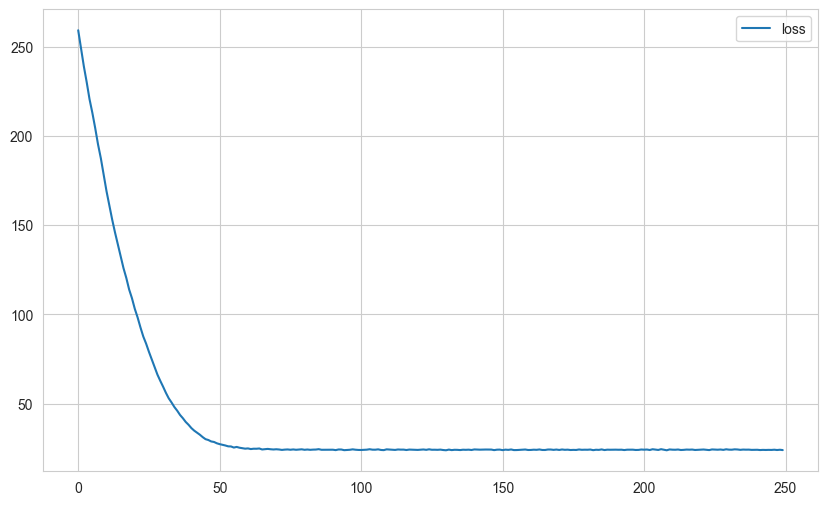

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

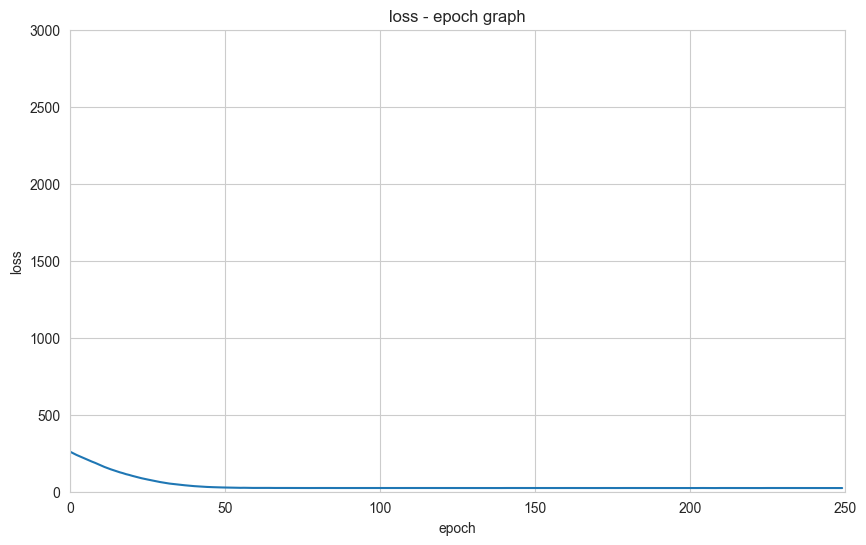

In [45]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values
plt.show()

## Model Performance

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
model.evaluate(X_train, y_train, verbose=0)

23.746776580810547

In [48]:
model.evaluate(X_test, y_test, verbose=0)

25.00498390197754

In [49]:
y_pred = model.predict(X_test)
y_pred.shape

10/10 [==============================] - 0s 778us/step


(300, 1)

In [50]:
y_test.shape

(300,)

In [51]:
y_pred.reshape(-1,).shape

(300,)

In [52]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
54,477.737,474.700
327,487.188,489.137
816,554.763,550.914
88,441.950,436.399
39,444.680,443.470
2,410.297,400.238
822,564.672,562.835
3,540.382,537.044
514,633.473,635.343
436,610.297,608.725


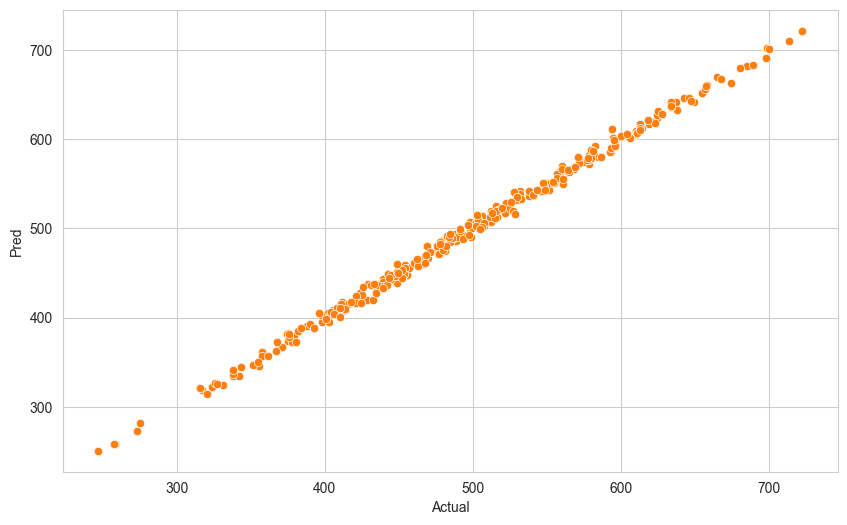

In [54]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)
plt.show()

In [55]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [56]:
eval_metric(y_test, y_pred)

r2_score: 0.9971559489669629 
mae: 4.007351855928843 
mse: 25.004986740512038 
rmse: 5.0004986491861025


## Final Model and Model Deployment

### Final Model Training

In [57]:
scaler = MinMaxScaler().fit(X)

In [58]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [59]:
X_scaled = scaler.transform(X)

In [60]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 0s 839us/step - loss: 257439.0625
Epoch 2/250
32/32 [==============================] - 0s 807us/step - loss: 257364.9062
Epoch 3/250
32/32 [==============================] - 0s 807us/step - loss: 257282.2500
Epoch 4/250
32/32 [==============================] - 0s 871us/step - loss: 257183.2344
Epoch 5/250
32/32 [==============================] - 0s 871us/step - loss: 257066.1094
Epoch 6/250
32/32 [==============================] - 0s 903us/step - loss: 256929.0469
Epoch 7/250
32/32 [==============================] - 0s 936us/step - loss: 256769.3438
Epoch 8/250
32/32 [==============================] - 0s 871us/step - loss: 256581.1094
Epoch 9/250
32/32 [==============================] - 0s 839us/step - loss: 256360.8438
Epoch 10/250
32/32 [==============================] - 0s 807us/step - loss: 256101.3438
Epoch 11/250
32/32 [==============================] - 0s 839us/step - loss: 255794.1562
Epoch 12/250
32/32 [=====================

32/32 [==============================] - 0s 871us/step - loss: 24.4873
Epoch 192/250
32/32 [==============================] - 0s 866us/step - loss: 24.6706
Epoch 193/250
32/32 [==============================] - 0s 839us/step - loss: 24.6028
Epoch 194/250
32/32 [==============================] - 0s 871us/step - loss: 24.5649
Epoch 195/250
32/32 [==============================] - 0s 968us/step - loss: 24.5848
Epoch 196/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7323
Epoch 197/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6973
Epoch 198/250
32/32 [==============================] - 0s 968us/step - loss: 24.5152
Epoch 199/250
32/32 [==============================] - 0s 968us/step - loss: 25.0961
Epoch 200/250
32/32 [==============================] - 0s 839us/step - loss: 24.4180
Epoch 201/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6418
Epoch 202/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7194
Ep

In [116]:
final_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 4)                 12        
                                                                 
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dense_50 (Dense)            (None, 4)                 20        
                                                                 
 dense_51 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [61]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [69]:
#final_model.save("model_fake_reg") 

### Loading Model

In [62]:
from tensorflow.keras.models import load_model

In [63]:
model_fake_reg = load_model('model_fake_reg.h5')

In [64]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [65]:
sample = [[998, 1000]]

In [66]:
sample_scaled = scaler_fake_reg.transform(sample)

In [67]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 46ms/step


array([[419.26913]], dtype=float32)

## Prediction-2

In [68]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [69]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [70]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [71]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 16ms/step


array([[379.16904],
       [330.84174],
       [282.51443],
       [234.18712],
       [185.97849]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___